In [1]:
import numpy as np               #numpy: Python數學計算基本模組 ，縮寫:np
import pandas as pd              #pandas: Python表格計算基本模組 ，縮寫:pd
import matplotlib.pyplot as plt  #matplotlib.pyplot: Python繪製圖片基本模組 ，縮寫:plt
import seaborn as sns            #Python更漂亮繪製圖片模組 ，縮寫:sns
import warnings                  #Python管理錯誤訊息模組

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold, learning_curve, train_test_split
from sklearn.preprocessing import LabelEncoder #先針對資料做數據清洗
from sklearn.feature_selection import RFECV #決定哪些資料是有價值的

In [3]:
# for display dataframe
from IPython.display import display
from IPython.display import display_html
def display_side_by_side(*args):         #做特徵工程顯示資料時用到
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [4]:
warnings.filterwarnings('ignore') #不顯示警告資訊
%matplotlib inline
#讓繪出的圖能正常顯示
sns.set(font_scale=1.56)          #設定seabon字體顯示大小

In [5]:
df_test = pd.read_csv('../../Desktop/py/test.csv')
df_train = pd.read_csv('../../Desktop/py/train.csv')
df_data = df_train.append(df_test)

In [6]:
#探索性分析EDA:
#模型考慮：抗噪強的(svm,knn,隨機森林)
#廣泛性：對小資料集來說三個都可以，但隨機森林可以平行化
def DatasetsInfo(train_data,test_data):   #利用.info()查看訓練與測試集資訊
    df_train.info()
    print("-" * 40)
    df_test.info()
DatasetsInfo(df_train,df_test)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

In [7]:
print(df_train.describe()) #顯示數值欄位各項統計數值(count,mean,std...)
print("-" * 40)
print(df_train.describe(include=['O'])) #顯示文字欄位各項統計數值，O代表object查看非數值資料

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
----------------------------------------
                                     Nam

In [8]:
def DatasetMissingPercentage(data):
    return pd.DataFrame({'DataMissingPercentage':data.isnull().sum() * 100 / len(df_train)})
     #以百分比顯示各欄位有多少缺值，用isnull()看資料缺值個數
DatasetMissingPercentage(df_train)

,DataMissingPercentage
PassengerId,0.000000
Survived,0.000000
Pclass,0.000000
Name,0.000000
Sex,0.000000
Age,19.865320
SibSp,0.000000
Parch,0.000000
Ticket,0.000000
Fare,0.000000


In [9]:
DatasetMissingPercentage(df_test)

,DataMissingPercentage
PassengerId,0.000000
Pclass,0.000000
Name,0.000000
Sex,0.000000
Age,9.652076
SibSp,0.000000
Parch,0.000000
Ticket,0.000000
Fare,0.112233
Cabin,36.700337


In [10]:
print('Id is unique.') if df_train.PassengerId.nunique() == df_train.shape[0] else print('oops')
print('Train and test sets are distinct.') if len(np.intersect1d(df_train.PassengerId.values, df_test.PassengerId.values))== 0 else print('oops')
#0表示train,test dataset資料一致
#查看資料是否有nan並設置datasetHasNan flag   
if df_train.count().min() == df_train.shape[0] and df_testset.count().min() == df_testset.shape[0] :
    print('We do not need to worry about missing values.') 
else:
    nas = pd.concat([df_train.isnull().sum(), df_test.isnull().sum()], axis=1, keys=['Train Dataset', 'Test Dataset']) 
    print('Nan in the data sets')
    print(nas[nas.sum(axis=1) > 0])

Id is unique.
Train and test sets are distinct.
Nan in the data sets
          Train Dataset  Test Dataset
Age                 177          86.0
Cabin               687         327.0
Embarked              2           0.0
Fare                  0           1.0


In [11]:
# Sex vs Survived
print(df_train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False))
print()
# Class vs Survived，存活率高到低，P1,P2,P3  
print(df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False))
print()
# Sex and Class vs Survived
print(df_train[['Sex', 'Pclass', 'Survived']].groupby(['Sex', 'Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False))
print()
# SibSp vs Survived
print(df_train[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False))
print()
# Parch vs Survived
print(df_train[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False))
print()
# Family vs Survived
df_train['Family'] = df_train['SibSp'] + df_train['Parch']
print(df_train[['Family', 'Survived']].groupby(['Family'], as_index=False).mean().sort_values(by='Survived', ascending=False))
print()
# Embark vs Survived
print(df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False))
print()

      Sex  Survived
0  female  0.742038
1    male  0.188908

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363

      Sex  Pclass  Survived
0  female       1  0.968085
1  female       2  0.921053
2  female       3  0.500000
3    male       1  0.368852
4    male       2  0.157407
5    male       3  0.135447

   SibSp  Survived
1      1  0.535885
2      2  0.464286
0      0  0.345395
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000

   Parch  Survived
3      3  0.600000
1      1  0.550847
2      2  0.500000
0      0  0.343658
5      5  0.200000
4      4  0.000000
6      6  0.000000

   Family  Survived
3       3  0.724138
2       2  0.578431
1       1  0.552795
6       6  0.333333
0       0  0.303538
4       4  0.200000
5       5  0.136364
7       7  0.000000
8      10  0.000000

  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.336957



Train Features


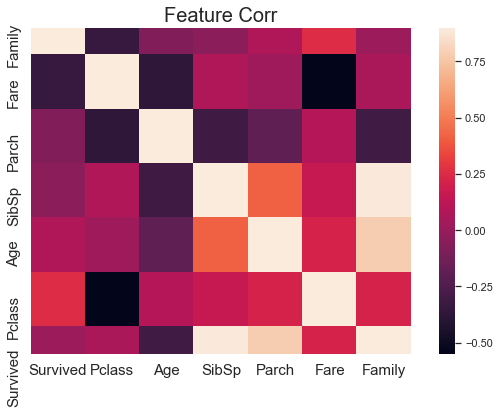

In [12]:
def FeatureCorreate(datasets,dropData):
    sns.set(context="paper", font="monospace")
    sns.set(style="white")
    f, ax = plt.subplots(figsize=(10,6))
    train_corr = datasets.drop(dropData,axis=1).corr()
    sns.heatmap(train_corr, ax=ax, vmax=.9, square=True)
    ax.set_xticklabels(train_corr.index, size=15)
    ax.set_yticklabels(train_corr.columns[::-1], size=15)
    ax.set_title('Feature Corr', fontsize=20)
print("Train Features")
FeatureCorreate(df_train,'PassengerId')

In [13]:
#3特徵工程,建模,訓練,預測
#轉換性別文字為數字
df_data['Sex_Code'] = df_data['Sex'].map({'female' : 1, 'male' : 0}).astype('int')

In [14]:
#再把訓練與測試集分開
df_train = df_data[:len(df_train)]
df_test = df_data[len(df_train):]

In [15]:
#定義預測與預測結果資料集
Y = df_train['Survived']
X = df_train.drop(labels=['Survived','PassengerId'],axis=1)

In [16]:
#基準模型，比他低可能加入太多噪聲的特徵，或過擬合了  
Base = ['Sex_Code','Pclass']
Base_Model = RandomForestClassifier(random_state=2,n_estimators=250,min_samples_split=20,oob_score=True)
Base_Model.fit(X[Base], Y)
print('Base oob score :%.5f' %(Base_Model.oob_score_))

Base oob score :0.73176


In [17]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 13 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
Sex_Code       1309 non-null int32
dtypes: float64(3), int32(1), int64(4), object(5)
memory usage: 138.1+ KB


In [33]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
train_data = pd.read_csv('../../Desktop/py/train.csv')
test_data = pd.read_csv('../../Desktop/py/test.csv')

Instructions for updating:
non-resource variables are not supported in the long term


In [34]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [35]:
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [36]:
# Feature Engineering
from sklearn.preprocessing import Imputer

def nan_padding(data, columns):
    for column in columns:
        imputer=Imputer()
        data[column]=imputer.fit_transform(data[column].values.reshape(-1,1))
    return data


nan_columns = ["Age", "SibSp", "Parch"]

train_data = nan_padding(train_data, nan_columns)
test_data = nan_padding(test_data, nan_columns)

In [37]:
#save PassengerId for evaluation
test_passenger_id=test_data["PassengerId"]
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0.0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0.0,0.0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0.0,0.0,373450,8.0500,NaN,S


In [38]:
def drop_not_concerned(data, columns):
    return data.drop(columns, axis=1)

not_concerned_columns = ["PassengerId","Name", "Ticket", "Fare", "Cabin", "Embarked"]
train_data = drop_not_concerned(train_data, not_concerned_columns)
test_data = drop_not_concerned(test_data, not_concerned_columns)

In [39]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1.0,0.0
1,1,1,female,38.0,1.0,0.0
2,1,3,female,26.0,0.0,0.0
3,1,1,female,35.0,1.0,0.0
4,0,3,male,35.0,0.0,0.0


In [40]:
test_data.head()

,Pclass,Sex,Age,SibSp,Parch
0,3,male,34.5,0.0,0.0
1,3,female,47.0,1.0,0.0
2,2,male,62.0,0.0,0.0
3,3,male,27.0,0.0,0.0
4,3,female,22.0,1.0,1.0


In [41]:
#將不是數值的部分數值化
from sklearn.preprocessing import LabelEncoder
def sex_to_int(data):
    le = LabelEncoder()
    le.fit(["male","female"])
    data["Sex"]=le.transform(data["Sex"]) 
    return data

train_data = sex_to_int(train_data)
test_data = sex_to_int(test_data)

from sklearn.preprocessing import MinMaxScaler

def normalize_age(data):
    scaler = MinMaxScaler()
    data["Age"] = scaler.fit_transform(data["Age"].values.reshape(-1,1))
    return data
train_data = normalize_age(train_data)
test_data = normalize_age(test_data)

train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,1,0.271174,1.0,0.0
1,1,1,0,0.472229,1.0,0.0
2,1,3,0,0.321438,0.0,0.0
3,1,1,0,0.434531,1.0,0.0
4,0,3,1,0.434531,0.0,0.0


In [42]:
def dummy_data(data, columns):
    for column in columns:
        data = pd.concat([data, pd.get_dummies(data[column], prefix=column)], axis=1)
        data = data.drop(column, axis=1)
    return data


dummy_columns = ["Pclass"]
train_data=dummy_data(train_data, dummy_columns)
test_data=dummy_data(test_data, dummy_columns)



In [43]:
test_data.head()

,Sex,Age,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3
0,1,0.452723,0.0,0.0,0,0,1
1,0,0.617566,1.0,0.0,0,0,1
2,1,0.815377,0.0,0.0,0,1,0
3,1,0.353818,0.0,0.0,0,0,1
4,0,0.287881,1.0,1.0,0,0,1


In [44]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

def split_valid_test_data(data, fraction=(1 - 0.8)):
    data_y = data["Survived"]
    lb = LabelBinarizer()
    data_y = lb.fit_transform(data_y)

    data_x = data.drop(["Survived"], axis=1)

    train_x, valid_x, train_y, valid_y = train_test_split(data_x, data_y, test_size=fraction)

    return train_x.values, train_y, valid_x, valid_y

train_x, train_y, valid_x, valid_y = split_valid_test_data(train_data)
print("train_x:{}".format(train_x.shape))
print("train_y:{}".format(train_y.shape))
print("train_y content:{}".format(train_y[:3]))

print("valid_x:{}".format(valid_x.shape))
print("valid_y:{}".format(valid_y.shape))


train_x:(712, 7)
train_y:(712, 1)
train_y content:[[1]
 [1]
 [0]]
valid_x:(179, 7)
valid_y:(179, 1)


In [59]:
# Build Neural Network
from collections import namedtuple

def build_neural_network(hidden_units=10):
    tf.reset_default_graph()
    inputs = tf.placeholder(tf.float32, shape=[None, train_x.shape[1]])
    labels = tf.placeholder(tf.float32, shape=[None, 1])
    learning_rate = tf.placeholder(tf.float32)
    is_training=tf.Variable(True,dtype=tf.bool)
    
    initializer = tf.truncated_normal_initializer(stddev=0.1)
    fc = tf.layers.dense(inputs, hidden_units, activation=None,kernel_initializer=initializer)
    fc=tf.layers.batch_normalization(fc, training=is_training)
    fc=tf.nn.relu(fc)
    
    logits = tf.layers.dense(fc, 1, activation=None)
    cross_entropy = tf.nn.sigmoid_cross_entropy_with_logits(labels=labels, logits=logits)
    cost = tf.reduce_mean(cross_entropy)
    
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

    predicted = tf.nn.sigmoid(logits)
    correct_pred = tf.equal(tf.round(predicted), labels)
    accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

    # Export the nodes 
    export_nodes = ['inputs', 'labels', 'learning_rate','is_training', 'logits',
                    'cost', 'optimizer', 'predicted', 'accuracy']
    Graph = namedtuple('Graph', export_nodes)
    local_dict = locals()
    graph = Graph(*[local_dict[each] for each in export_nodes])

    return graph

model = build_neural_network()

Instructions for updating:
Please use `layer.__call__` method instead.
Instructions for updating:
Use keras.layers.BatchNormalization instead.  In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.batch_normalization` documentation).


In [60]:
def get_batch(data_x,data_y,batch_size=32):
    batch_n=len(data_x)//batch_size
    for i in range(batch_n):
        batch_x=data_x[i*batch_size:(i+1)*batch_size]
        batch_y=data_y[i*batch_size:(i+1)*batch_size]
        
        yield batch_x,batch_y

In [61]:
epochs = 200
train_collect = 50
train_print=train_collect*2

learning_rate_value = 0.001
batch_size=16

x_collect = []
train_loss_collect = []
train_acc_collect = []
valid_loss_collect = []
valid_acc_collect = []

saver = tf.train.Saver()
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    iteration=0
    for e in range(epochs):
        for batch_x,batch_y in get_batch(train_x,train_y,batch_size):
            iteration+=1
            feed = {model.inputs: train_x,
                    model.labels: train_y,
                    model.learning_rate: learning_rate_value,
                    model.is_training:True
                   }

            train_loss, _, train_acc = sess.run([model.cost, model.optimizer, model.accuracy], feed_dict=feed)
            
            if iteration % train_collect == 0:
                x_collect.append(e)
                train_loss_collect.append(train_loss)
                train_acc_collect.append(train_acc)

                if iteration % train_print==0:
                     print("Epoch: {}/{}".format(e + 1, epochs),
                      "Train Loss: {:.4f}".format(train_loss),
                      "Train Acc: {:.4f}".format(train_acc))
                        
                feed = {model.inputs: valid_x,
                        model.labels: valid_y,
                        model.is_training:False
                       }
                val_loss, val_acc = sess.run([model.cost, model.accuracy], feed_dict=feed)
                valid_loss_collect.append(val_loss)
                valid_acc_collect.append(val_acc)
                
                if iteration % train_print==0:
                    print("Epoch: {}/{}".format(e + 1, epochs),
                      "Validation Loss: {:.4f}".format(val_loss),
                      "Validation Acc: {:.4f}".format(val_acc))
                

    saver.save(sess, "./titanic.ckpt")

Epoch: 3/200 Train Loss: 0.4320 Train Acc: 0.8160
Epoch: 3/200 Validation Loss: 0.6074 Validation Acc: 0.6648
Epoch: 5/200 Train Loss: 0.4047 Train Acc: 0.8216
Epoch: 5/200 Validation Loss: 0.5461 Validation Acc: 0.7598
Epoch: 7/200 Train Loss: 0.3968 Train Acc: 0.8272
Epoch: 7/200 Validation Loss: 0.5004 Validation Acc: 0.7765
Epoch: 10/200 Train Loss: 0.3911 Train Acc: 0.8315
Epoch: 10/200 Validation Loss: 0.4760 Validation Acc: 0.7989
Epoch: 12/200 Train Loss: 0.3887 Train Acc: 0.8371
Epoch: 12/200 Validation Loss: 0.4679 Validation Acc: 0.7989
Epoch: 14/200 Train Loss: 0.3875 Train Acc: 0.8357
Epoch: 14/200 Validation Loss: 0.4669 Validation Acc: 0.7933
Epoch: 16/200 Train Loss: 0.3866 Train Acc: 0.8371
Epoch: 16/200 Validation Loss: 0.4668 Validation Acc: 0.7821
Epoch: 19/200 Train Loss: 0.3856 Train Acc: 0.8399
Epoch: 19/200 Validation Loss: 0.4646 Validation Acc: 0.7765
Epoch: 21/200 Train Loss: 0.3850 Train Acc: 0.8399
Epoch: 21/200 Validation Loss: 0.4717 Validation Acc: 0.776

Epoch: 169/200 Train Loss: 0.3629 Train Acc: 0.8525
Epoch: 169/200 Validation Loss: 0.5039 Validation Acc: 0.7542
Epoch: 171/200 Train Loss: 0.3629 Train Acc: 0.8525
Epoch: 171/200 Validation Loss: 0.4969 Validation Acc: 0.7598
Epoch: 173/200 Train Loss: 0.3629 Train Acc: 0.8525
Epoch: 173/200 Validation Loss: 0.4858 Validation Acc: 0.7933
Epoch: 175/200 Train Loss: 0.3629 Train Acc: 0.8483
Epoch: 175/200 Validation Loss: 0.4827 Validation Acc: 0.7933
Epoch: 178/200 Train Loss: 0.3629 Train Acc: 0.8539
Epoch: 178/200 Validation Loss: 0.4992 Validation Acc: 0.7598
Epoch: 180/200 Train Loss: 0.3628 Train Acc: 0.8539
Epoch: 180/200 Validation Loss: 0.4906 Validation Acc: 0.7877
Epoch: 182/200 Train Loss: 0.3629 Train Acc: 0.8511
Epoch: 182/200 Validation Loss: 0.4769 Validation Acc: 0.8045
Epoch: 185/200 Train Loss: 0.3629 Train Acc: 0.8511
Epoch: 185/200 Validation Loss: 0.4875 Validation Acc: 0.7933
Epoch: 187/200 Train Loss: 0.3628 Train Acc: 0.8525
Epoch: 187/200 Validation Loss: 0.50

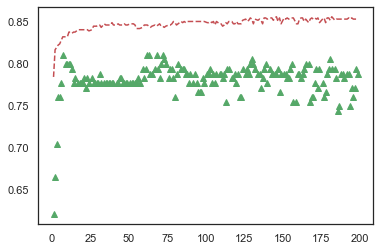

In [64]:
plt.plot(x_collect, train_acc_collect, "r--")
plt.plot(x_collect, valid_acc_collect, "g^")
plt.show()

In [65]:
model=build_neural_network()
restorer=tf.train.Saver()
with tf.Session() as sess:
    restorer.restore(sess,"./titanic.ckpt")
    feed={
        model.inputs:test_data,
        model.is_training:False
    }
    test_predict=sess.run(model.predicted,feed_dict=feed)
    
test_predict[:10]

INFO:tensorflow:Restoring parameters from ./titanic.ckpt


array([[0.09392172],
       [0.61960185],
       [0.07635927],
       [0.15304533],
       [0.29214144],
       [0.15586638],
       [0.65079725],
       [0.09499383],
       [0.59379727],
       [0.06671795]], dtype=float32)

In [66]:
from sklearn.preprocessing import Binarizer
binarizer=Binarizer(0.5)
test_predict_result=binarizer.fit_transform(test_predict)
test_predict_result=test_predict_result.astype(np.int32)
test_predict_result[:10]

array([[0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0]])

In [67]:
passenger_id=test_passenger_id.copy()
evaluation=passenger_id.to_frame()
evaluation["Survived"]=test_predict_result
evaluation[:10]

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,0
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [68]:
evaluation.to_csv("evaluation_submission.csv",index=False)